# Geopandas: Explore Phase Tensor Ellipses and Tipper Shape Files


    *  How to concatenate multiple geopandas frames?
    *  How to chnage the geometry crs
    *  how to display on a basemap
    *  how to display on folium map


## http://geopandas.org/index.html
## https://geohackweek.github.io/vector/04-geopandas-intro/
## https://pythongisresources.wordpress.com/packages/


In [1]:
import os,sys
import glob

import numpy as np
import pandas as pd
import geopandas as gpd

%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib as mpl


mpl.rcParams['lines.linewidth'] = 2
# mpl.rcParams['lines.color'] = 'r'

mpl.rcParams['figure.figsize']=[30,10]

# Reading and Wrting Shape files

In [27]:
# #shpfile=r'E:\MT_shape_files\PT_0.8547s_WGS84.shp'
# shpfile=r'/Softlab/Data/MT_datasets/75099_Youanmi/Phase_Tensor_Shapes/PT_109.23s_WGS84.shp'
# shpfile=r'/Softlab/Data/MT_datasets/75098/Location_shapefile/YOM_MT_CDP.shp'

SHAPE_DIR='/Softlab/Data/MT_datasets/75099_Youanmi/Phase_Tensor_Shapes'
#'/Softlab/Data/MT_datasets/75098/Phase_Tensor_Shapes'  # wrongly mapped to UTM zone
#r'/Softlab/Data/MT_datasets/728889/Phase_Tensor_Shapes'

shapefile_list=glob.glob(SHAPE_DIR+'/*.shp')
#shapefile_list=glob.glob(SHAPE_DIR+'/T*.shp')
print ("Number of shape files found in %s: %s"% (SHAPE_DIR, len(shapefile_list)))

Number of shape files found in /Softlab/Data/MT_datasets/75099_Youanmi/Phase_Tensor_Shapes: 75


{u'no_defs': True, u'ellps': u'GRS80', u'proj': u'longlat'}


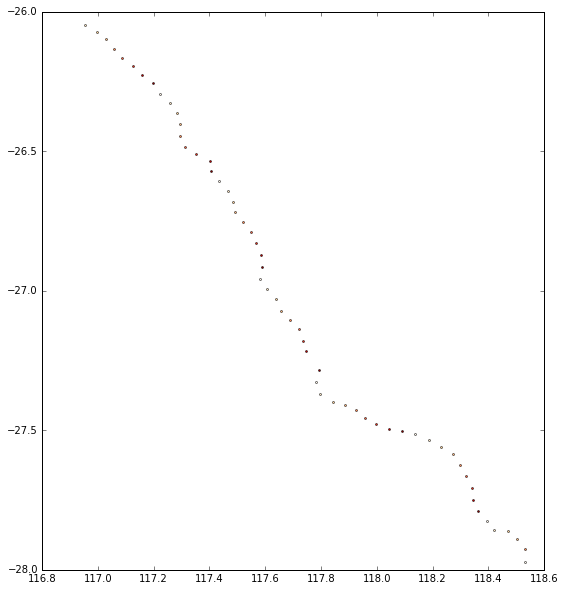

In [28]:
# check the MT site real locations

shpfile=r'/Softlab/Data/MT_datasets/75098/Location_shapefile/YOM_MT_CDP.shp'
shpfile='/Softlab/Data/MT_datasets/75099_Youanmi/Location_shapefiles/YMB1.shp'

shpf=gpd.GeoDataFrame.from_file(shpfile)

print(shpf.crs)

shpf.plot(cmap='OrRd', scheme='quantiles');  #(marker='o', color='red', markersize=5)


In [29]:
icount=0

shpfile= shapefile_list[icount]
print ("Processing shape file: %s",shpfile)

shpf=gpd.GeoDataFrame.from_file(shpfile)

shpf.head()


('Processing shape file: %s', '/Softlab/Data/MT_datasets/75099_Youanmi/Phase_Tensor_Shapes/Tip_40.96s_WGS84_real.shp')


,Name,ang_real,geometry,mag_real
0,YMB005,0.0,"POLYGON ((508631.527086 7105931.513288, 508601...",0.0
1,YMB058,0.0,"POLYGON ((648062.115955 6914147.387968, 648032...",0.0
2,YMB043,0.0,"POLYGON ((598616.279599 6960096.265276, 598586...",0.0
3,YMB045,0.0,"POLYGON ((607689.8290190001 6957397.961509, 60...",0.0
4,YMB028,0.0,"POLYGON ((560310.531479 7014228.097551, 560280...",0.0


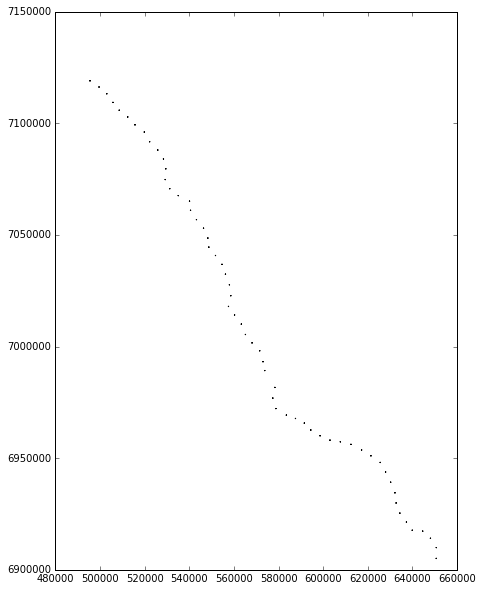

In [30]:
shpf.plot()


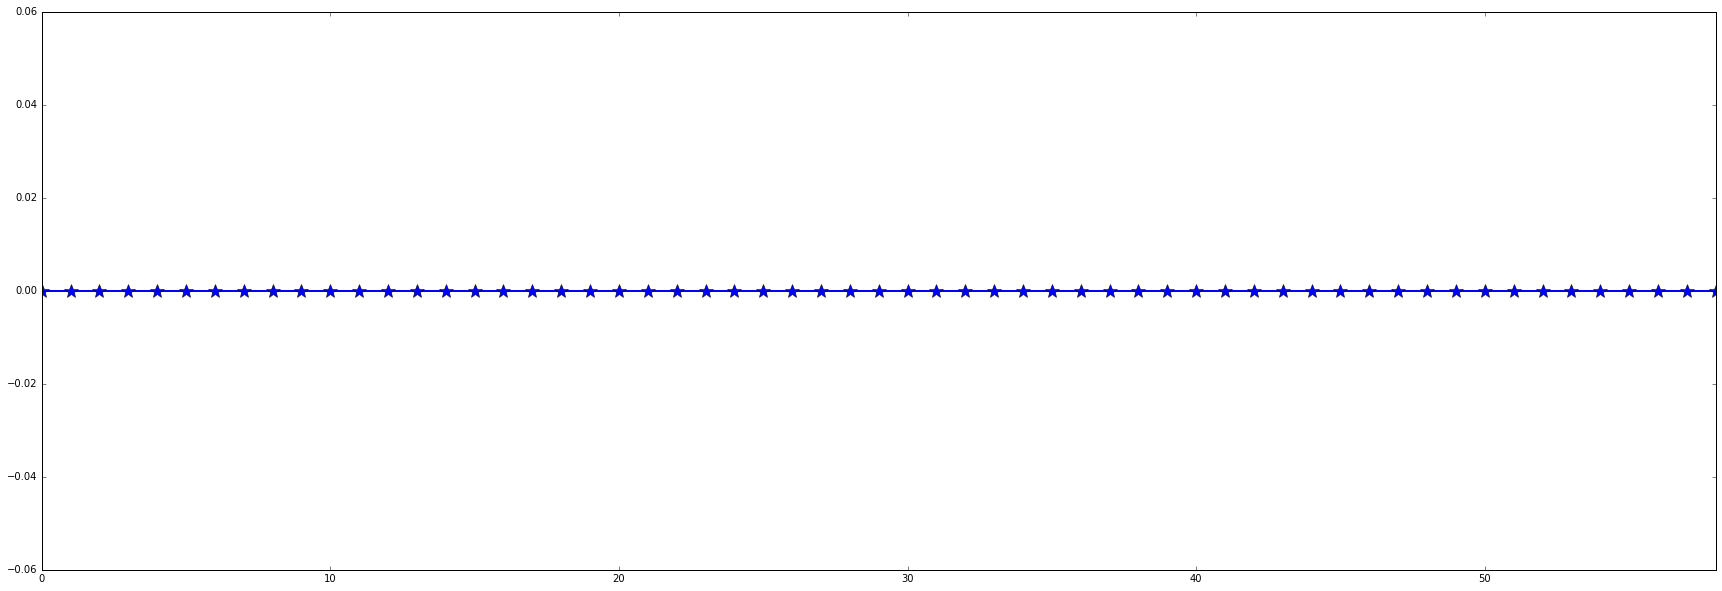

In [31]:
if 'mag_real' in shpf.columns.values:
    shpf['mag_real'].plot(marker='*', markersize=14)
    
if 'phi_max'  in shpf.columns.values:
    shpf['phi_max'].plot(marker='*', markersize=14)

# Re-Projecting

In [32]:
shpf.geometry.crs

{'init': u'epsg:32750'}

In [33]:
# WGS84: 'epsg:4326'

# GDA94:  EPSG:4283 See  http://epsg.io/4283

#http://spatialreference.org/ref/epsg/4283/
    
myshpf= shpf.to_crs({'init':'epsg:4283'}) 


In [34]:
myshpf.geometry.crs

{'init': 'epsg:4283'}

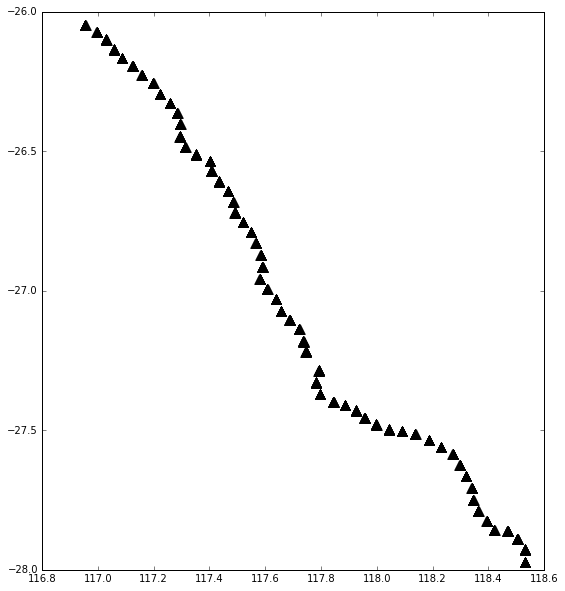

In [35]:
myshpf.plot(marker='^', markersize=10)


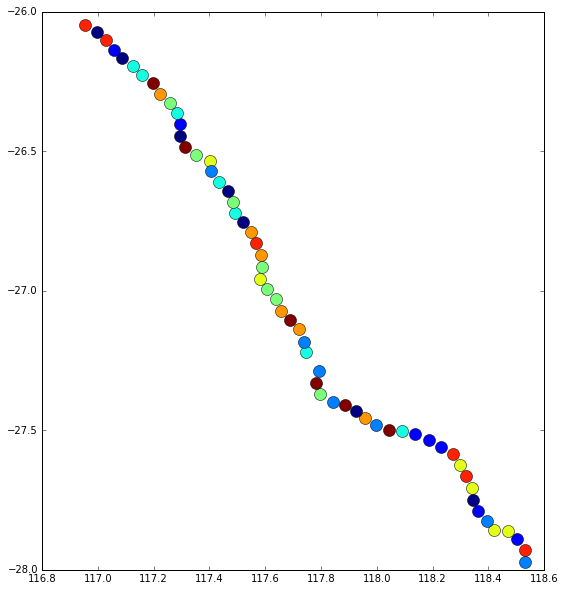

In [36]:
# Now, we create centroids and make it the geometry:

myshpf['centroid_column'] =myshpf.centroid

myshpf = myshpf.set_geometry('centroid_column')

myshpf.plot(marker='o', markersize='12');

In [37]:
myshpf.iloc[-2:]

,Name,ang_real,geometry,mag_real,centroid_column
57,YMB007,0.0,POLYGON ((117.1571299999951 -26.22501699999947...,0.0,POINT (117.1571311121288 -26.2258447026667)
58,YMB010,0.0,POLYGON ((117.2596500000049 -26.32675000000327...,0.0,POINT (117.2596518459801 -26.3275776855042)


In [38]:
myshpf['geometry'][:10]

0    POLYGON ((117.0863700000035 -26.16598300000366...
1    POLYGON ((118.5042500000052 -27.8893329999995,...
2    POLYGON ((117.9982000000031 -27.47915000000348...
3    POLYGON ((118.0902700000007 -27.50281699999651...
4    POLYGON ((117.607830000002 -26.99270000000359,...
5    POLYGON ((118.4686699999961 -27.86086700000412...
6    POLYGON ((117.9561299999978 -27.4561500000001,...
7    POLYGON ((116.9553799999999 -26.04705000000078...
8    POLYGON ((117.3136700000037 -26.48291700000358...
9    POLYGON ((116.9958200000014 -26.0720000000045,...
Name: geometry, dtype: object

## Mapping onto World Basemap

In [39]:
# geopandas included shape datasets
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

world.shape

(177, 6)

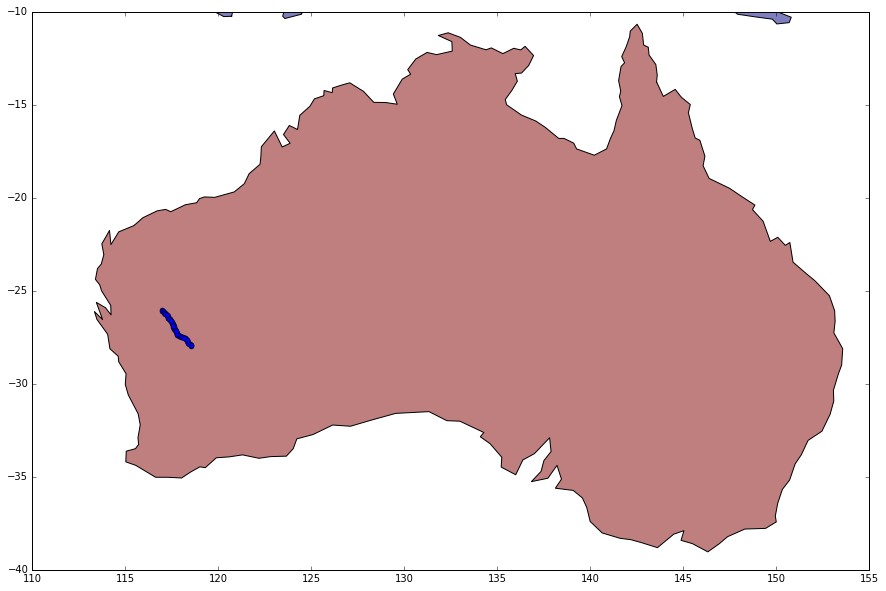

In [40]:


myax=world.plot(alpha=0.5)
#myax.set_xlim([149,150])
myax.set_xlim([110,155])
myax.set_ylim([-40,-10])
    
myax=myshpf.plot(ax=myax, figsize=(10, 6),  marker='o', color='blue', markersize=5);

In [41]:
# what if the crs are different in layers.
world.crs

{'init': u'epsg:4326'}

# Mapping with Folium

In [42]:
# conda install folium

import folium

mapa = folium.Map([-30.0, 149.0], zoom_start=4,   tiles='cartodbpositron')


In [43]:
myshpf = myshpf.set_geometry('geometry')
myshp2json=myshpf.geometry.to_json()

points =folium.features.GeoJson(myshp2json)
mapa.add_children(points)

In [44]:
geoj2=shpf.to_crs(epsg=4326).to_json()

points2 =folium.features.GeoJson(geoj2)
mapa.add_children(points2)

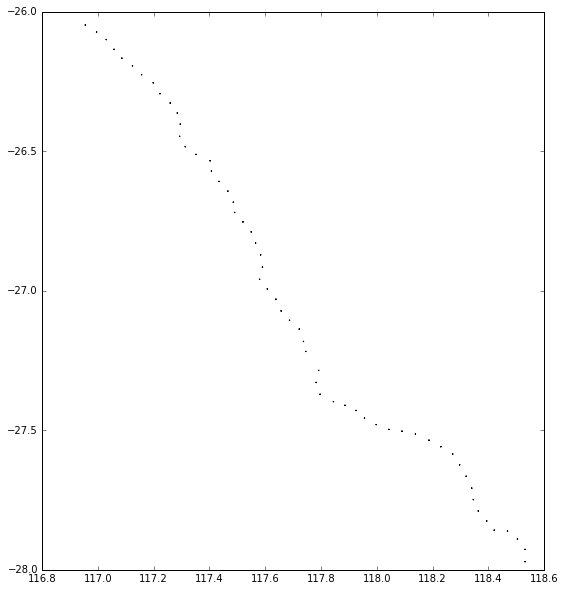

In [45]:
shpf3= shpf.to_crs({'init': 'epsg:4326'})
shpf3.plot()


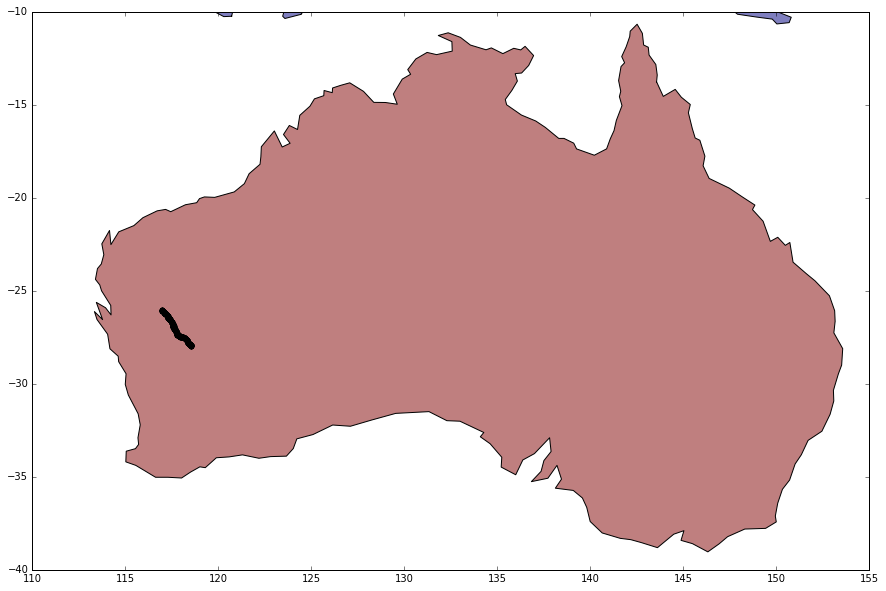

In [46]:
myax=world.plot(alpha=0.5)
#myax.set_xlim([149,150])
myax.set_xlim([110,155])
myax.set_ylim([-40,-10])
shpf3.plot(ax=myax, figsize=(10, 6),  marker='o', color='blue', markersize=5);

In [47]:
# In case need to join a few similar shape files to view and analyze
def concat_join(shapefile_list):
    
    gdf_list=[]
    for shpfile in shapefile_list:
        print ("Processing shape file: %s",shpfile)

        shp_gpd=gpd.GeoDataFrame.from_file(shpfile)
        gdf_list.append(shp_gpd)

        print(shp_gpd.shape, shp_gpd.columns)
        print("Projection: ", shp_gpd.crs)

    # ideally, the shape files are of the same structure, then they can be joined well.
    rdf = gpd.GeoDataFrame( pd.concat( shp_list[:5], ignore_index=True) )
    # if shape files have different columns, the concat will produce a many more columns gpd!!!!!

    print(rdf.shape, rdf.columns)

    print(rdf.head())
            
    return rdf


# testing sum_shape= concat_join(shapefile_list)
#rdf.plot()